# Munajj_Enterprise 

Munajj Enterprises is the leading company in clean energy technologies. With a foucs in innovation and manufracturing of Solar and Hydrogen powered systems, we provide effiecent products that can be tailored for any power needs and specifications.

### Busness Process Diagram

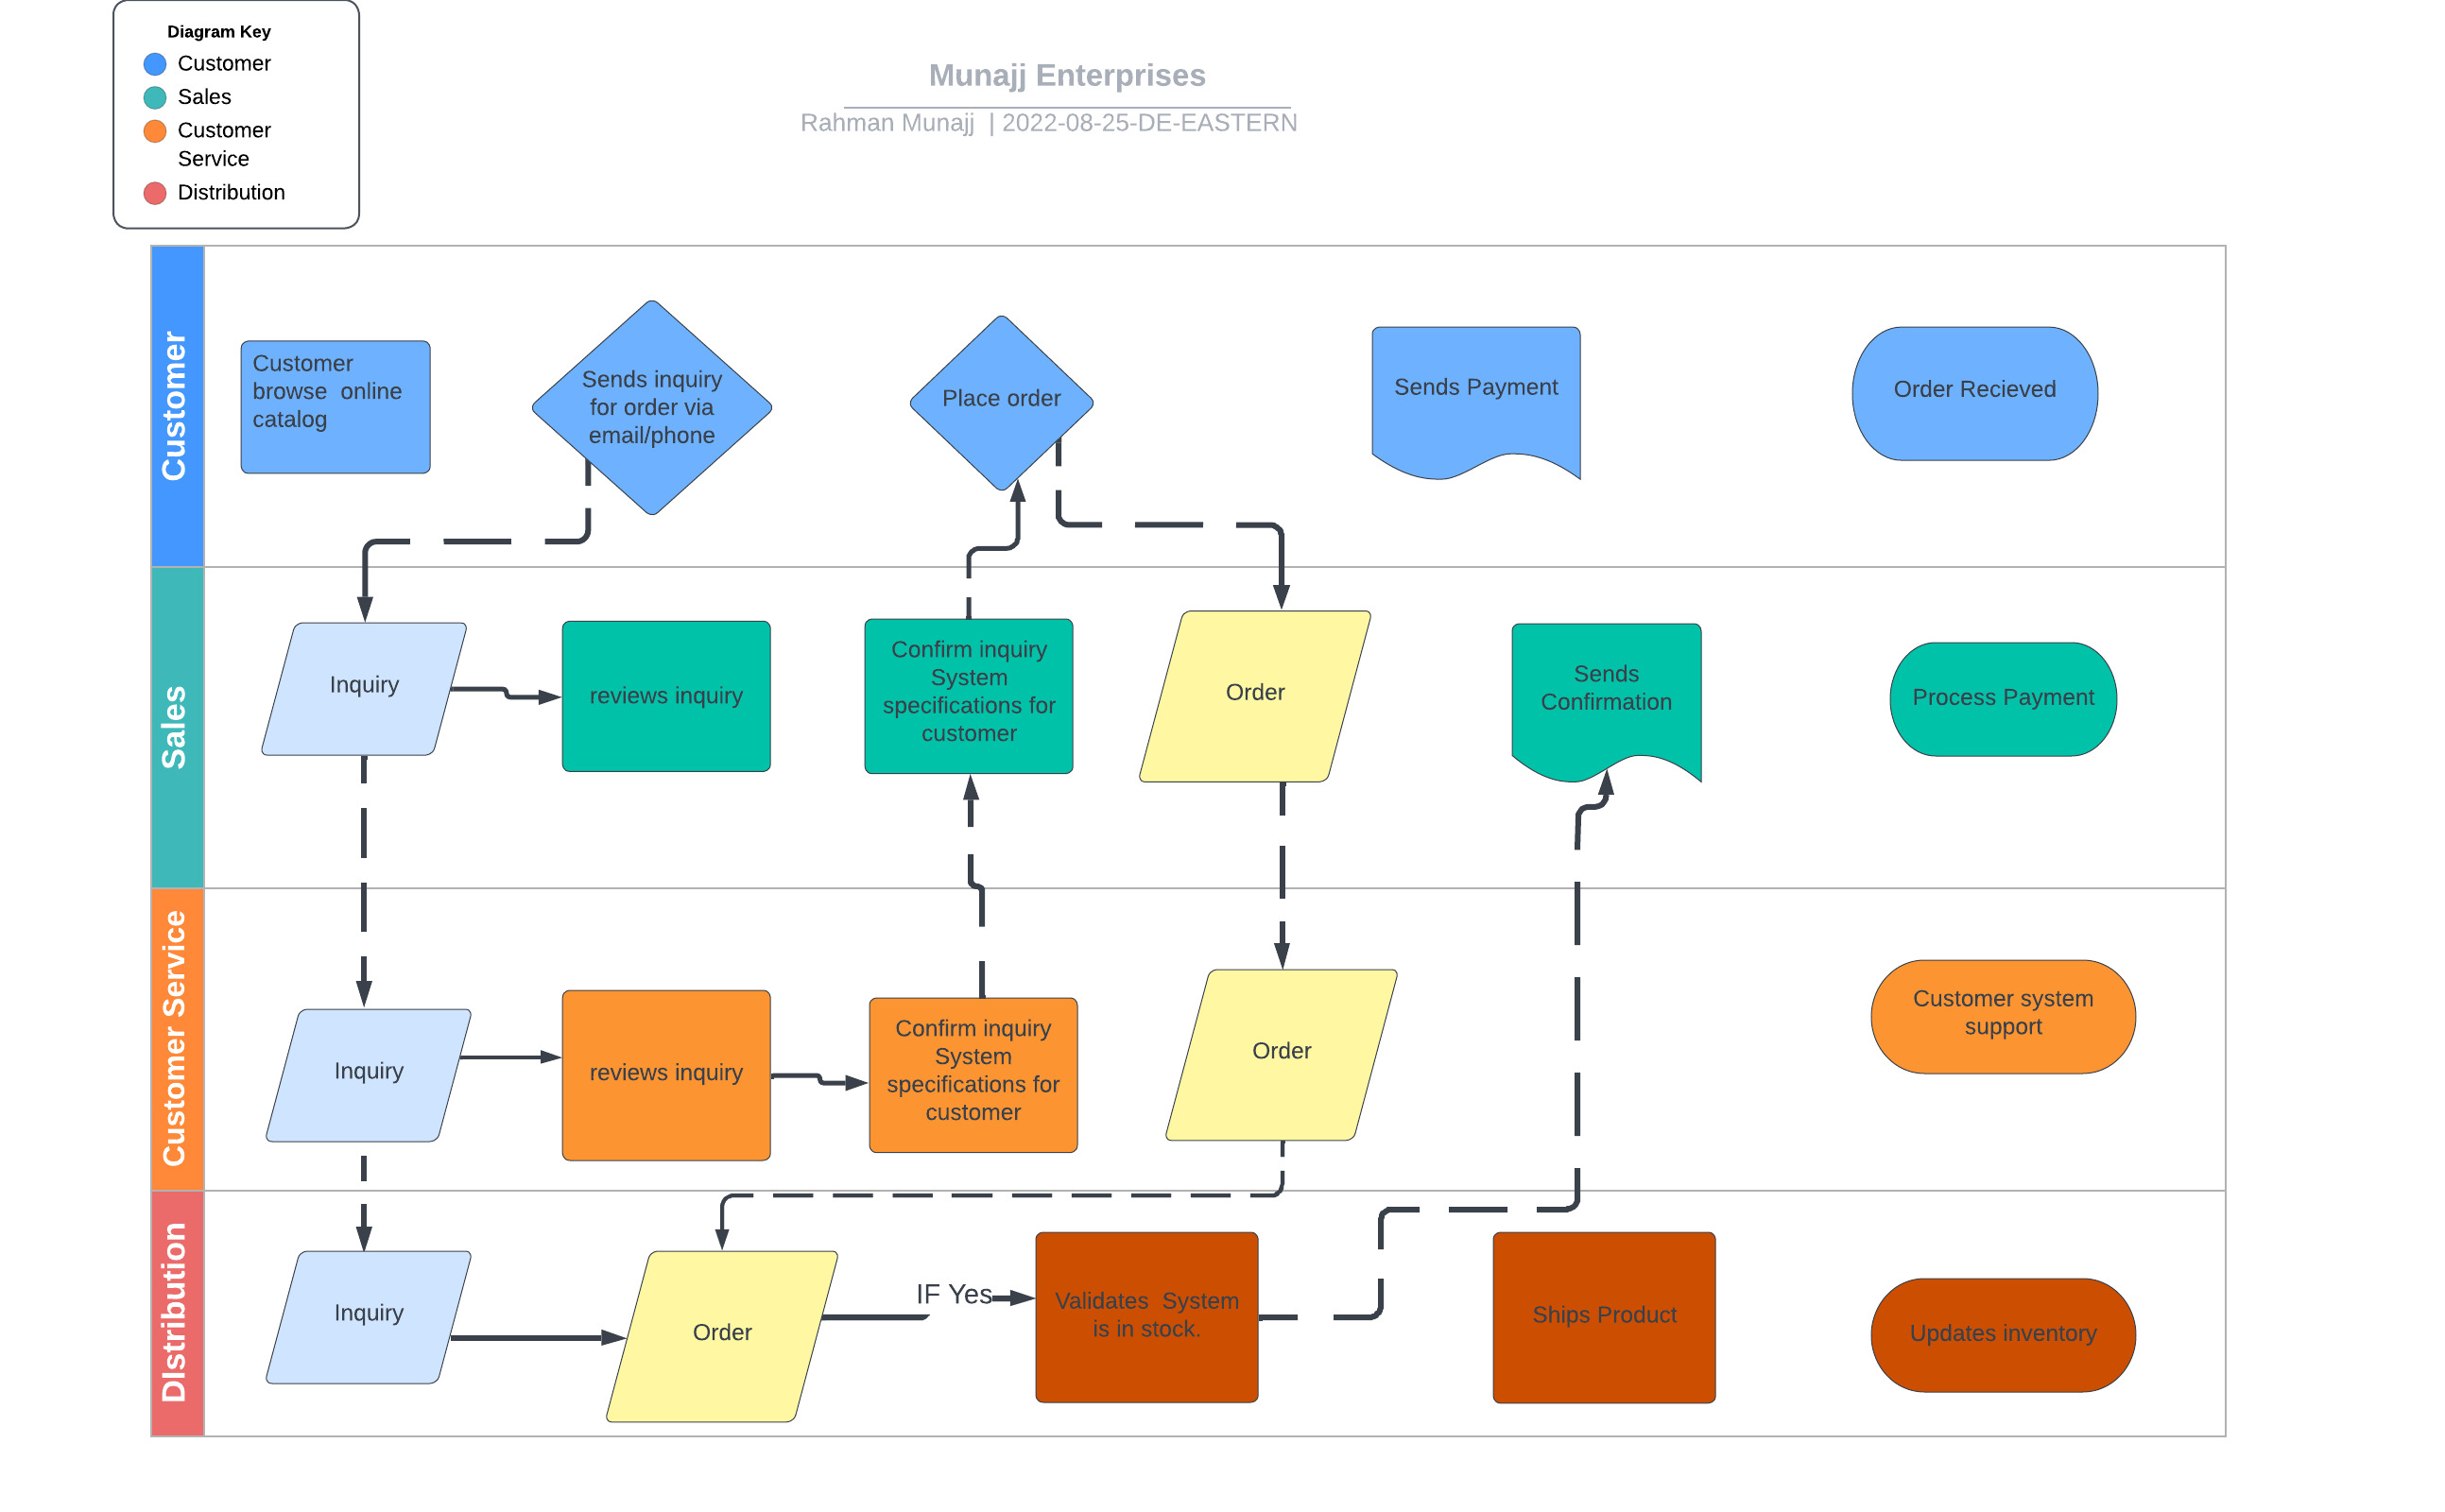

### Physical ERD Diagram

Diagram contains transactional and company relationships.

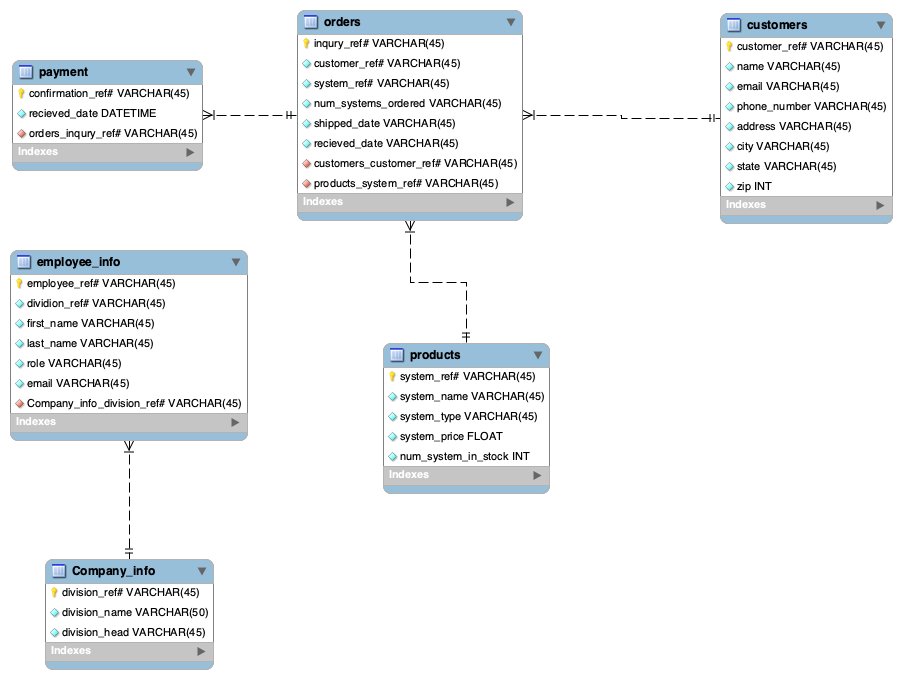

### MunajjENT DATABASE DDL

DDL was deployed on a AWS RDS server(SQL Express Edition)

In [ ]:
create table dbo.Company_info
(
    'division_ref#' varchar(45) not null
        primary key,
    'division_name' varchar(50) not null,
    'division_head' varchar(45) not null
)
go

create table dbo.customers
(
    'customer_ref#' varchar(45) not null
        primary key,
    'name'          varchar(45) not null,
    'email'         varchar(45) not null,
    'phone_number'  varchar(45) not null,
    'address'       varchar(45) not null,
    'city'          varchar(45) not null,
    'state'         varchar(45) not null,
    'zip'           int         not null
)
go

create table dbo.employee_info
(
    'employee_ref#' varchar(45) not null
        primary key,
    'division_ref#' varchar(45) not null
        constraint fk_employee_info
            references dbo.Company_info,
    'first_name'    varchar(45) not null,
    'last_name'     varchar(45) not null,
    'email'         varchar(45) not null
)
go

create table dbo.products
(
    'system_ref#'         varchar(45) not null
        primary key,
    'system_name'         varchar(45) not null,
    'system_type'         varchar(45) not null,
    'system_price'        varchar(45) not null,
    'num_system_in_stock' int         not null
)
go

create table dbo.orders
(
    'inquiry_ref#'  varchar(45) not null
        primary key,
    'customer_ref#'' varchar(45) not null
        constraint fk_customers_1
            references dbo.customers,
    'system_ref#'   varchar(45) not null
        constraint fk_orders_2
            references dbo.products,
    'shipped_date'  date        not null,
    'received_date' date        not null
)
go

create table dbo.payment
(
    'inquiry_ref#''      varchar(45) not null
        constraint fk_payment_1
            references dbo.orders,
    'confirmation_ref#'' varchar(45) not null
        primary key,
    'pay_date'          date        not null
)
go

### Data Generation

Data was generated using a combination of Faker.py and webscrapping data using BS4.py; then ingested into database schema.

#### Company_info.py

In [ ]:
import pandas as pd
from faker import Faker


fake = Faker('en_US')

div_id= []

for i in range(0, 7):
    generate_ids = 'dr' + fake.iana_id()
    div_id.append(generate_ids)


div_head = []

for i in range(0, 7):
    name = fake.name()
    div_head.append(name)


div_name= ['Management',
           'Sales',
           'Informations',
           'R&D',
           'Manufacturing',
           'Marketing',
           'Customer Service']

dict = {'division_ref#': div_id, 'division_name': div_name, 'division_head': div_head}

df = pd.DataFrame(dict)
df.to_csv('Company_info.csv')

#### customers.py

In [ ]:
import csv
from faker import Faker


def fake_data_generation(records, headers):
    fake = Faker('en_US')
    with open("customers.csv", 'wt') as csvFile:
        writer = csv.DictWriter(csvFile, fieldnames=headers)
        writer.writeheader()
        for i in range(records):
            generate_ids = 'cr' + fake.iana_id()

            writer.writerow({
                "customer_ref#": generate_ids,
                "name": fake.name(),
                "phone_number": fake.phone_number(),
                "email": fake.email(),
                "address": fake.street_address(),
                "city": fake.city(),
                "state": fake.state(),
                "zip": fake.zipcode(),
            })


if __name__ == '__main__':
    records = 800
    headers = ["customer_ref#", "name", "email", "phone_number", "address", "city", "state", "zip"]
    fake_data_generation(records, headers)
    print("CSV complete!")

#### employee_info.py

In [ ]:
import random

import pandas as pd
from faker import Faker

fake = Faker('en_US')

Company_info_df = pd.read_csv('/Users/brettsims/PycharmProjects/pythonProject9/Company_info.csv')

employee_info = []
division_ref= ['dr8352325', 'dr1007613', 'dr4393821', 'dr8114641', 'dr1172212', 'dr5086698', 'dr2114622']

for i in range(0, 1000):
    generate_id = 'ei' + fake.iana_id()
    first_name = fake.first_name()
    last_name = fake.last_name()

    employee_info.append({'employee_ref#': generate_id,
                         'first_name': first_name,
                          'last_name': last_name,
                          'email': str.lower(f'{first_name}.{last_name}@munajj.ent.com'),
                          'division_ref#': random.choice(division_ref)})


employee_info_df = pd.DataFrame(employee_info)
employee_info_table = employee_info_df.to_csv('employee_info.csv')

#### orders.py

In [ ]:
from datetime import datetime

import pandas as pd
from faker import Faker


customers_df= pd.read_csv('/Users/brettsims/PycharmProjects/pythonProject9/customers.csv')
products_df= pd.read_csv('/Users/brettsims/PycharmProjects/pythonProject9/products.csv')


orders = []

fake = Faker('en_US')


for i in range(0, 700):
    generate_ids = 'ord' + fake.iana_id()
    generate_shipped_date = fake.date_between_dates(date_start=datetime(2021, 8, 2), date_end=datetime(2021, 9, 2))
    generate_received_date = fake.date_between_dates(date_start=datetime(2021, 8, 8), date_end=datetime(2021, 9, 28))

    orders.append({'inquiry_ref#': generate_ids,
                   'shipped_date': generate_shipped_date,
                   'received_date': generate_received_date})


orders_df = pd.DataFrame(orders)
orders_df['customer_ref#'] = customers_df['customer_ref#'].sample(n=700, replace=True, ignore_index=True)
orders_df['system_ref#'] = products_df['system_ref#'].sample(n=700, replace=True, ignore_index=True)
orders_table = orders_df.to_csv('orders.csv')

#### payment.py

In [ ]:
from datetime import datetime


fake = Faker('en_US')

orders_df= pd.read_csv('/Users/brettsims/PycharmProjects/pythonProject9/orders.csv')
payment = []

for i in range(0, 700):

    generate_id = 'pc' + fake.iana_id()

    payment.append({'confirmation_ref#': generate_id,
                    'pay_date': fake.date_between_dates(date_start=datetime(2021, 7, 20), date_end=datetime(2021, 8, 25))})


payment_df = pd.DataFrame(payment)
payment_df['inquiry_ref#'] = orders_df['inquiry_ref#'].sample(n=700, replace=True, ignore_index=True)
payment_table = payment_df.to_csv('payment.csv')

#### products.py

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
from faker import Faker

r = requests.get('https://shopsolarkits.com/collections/solar-power-systems')

soup = BeautifulSoup(r.content, 'html.parser')

solar_product = []

for link in soup.find_all('a', class_='product-grid-item__product-name'):
    solar_product.append(link.get('href'))

solar_mod_product = solar_product[1:5]
print(solar_mod_product)

solar_price = []

for price in soup.find_all('span', class_='money js-product-price'):
    solar_price.append(price.text)

s_mod = [x.strip() for x in solar_price]

solar_mod_price = s_mod[1:5]
print(solar_mod_price)

a = requests.get('https://www.fuelcellstore.com/fuel-cell-stacks/high-power-fuel-cell-stacks')

salad = BeautifulSoup(a.content, 'html.parser')

hydro_product = []
for name in salad.find_all('div', class_='name'):
    hydro_product.append(name.text)

hydro_mod_product = hydro_product[0:5]
print(hydro_mod_product)

hydro_price = []
for price in salad.find_all('div', class_='price'):
    hydro_price.append(price.text)

h = [x.strip() for x in hydro_price]
delete = 'From'
h_mod = [x.replace('From', '') for x in h]
hydro_mod_price = h_mod[0:5]
print(hydro_mod_price)

fake = Faker('en_US')

id = []

for i in range(0, 9):
    generate_ids = 'sy' + fake.iana_id()
    id.append(generate_ids)
    print(id)

num_stock = []

for l in range(0, 9):
    num_stock.append(fake.random_int(min=1, max=29))
    print(num_stock)

total_products_list = solar_mod_product + hydro_mod_product

total_price_list = solar_mod_price + hydro_mod_price

type_of = ['solar', 'solar', 'solar', 'solar', 'hydrogen', 'hydrogen', 'hydrogen', 'hydrogen', 'hydrogen']

dict = {'system_id': id,
        'system_name': total_products_list,
        'system_type': type_of,
        'system_price': total_price_list,
        'num_system_in_stock': num_stock}

df = pd.DataFrame(dict)
df.to_csv('products.csv')

### ETL Job

Created a DataLake using AWS Glue Crawler and Lake Formation with the needed permissions. Then Glue ETL job was run to injest and convert the data to parquet file into the assigned S3 bucket.

#### Company_info transfer

In [ ]:
import sys
from awsglue.transforms import *
from awsglue.utils import getResolvedOptions
from pyspark.context import SparkContext
from awsglue.context import GlueContext
from awsglue.job import Job

args = getResolvedOptions(sys.argv, ["JOB_NAME"])
sc = SparkContext()
glueContext = GlueContext(sc)
spark = glueContext.spark_session
job = Job(glueContext)
job.init(args["JOB_NAME"], args)

# Script generated for node SQL Server table
SQLServertable_node1 = glueContext.create_dynamic_frame.from_catalog(
    database="capstone_project",
    table_name="munajjent_dbo_company_info",
    transformation_ctx="SQLServertable_node1",
)

# Script generated for node ApplyMapping
ApplyMapping_node2 = ApplyMapping.apply(
    frame=SQLServertable_node1,
    mappings=[
        ("division_ref#", "string", "division_ref#", "string"),
        ("division_name", "string", "division_name", "string"),
        ("division_head", "string", "division_head", "string"),
    ],
    transformation_ctx="ApplyMapping_node2",
)

ApplyMapping_node2 = ApplyMapping_node2.coalesce(1)

# Script generated for node S3 bucket
S3bucket_node3 = glueContext.write_dynamic_frame.from_options(
    frame=ApplyMapping_node2,
    connection_type="s3",
    format="glueparquet",
    connection_options={"path": "s3://clu-fun-storage/MunajjENT/", "partitionKeys": []},
    transformation_ctx="S3bucket_node3",
)

job.commit()

#### customers transfer

In [ ]:
import sys
from awsglue.transforms import *
from awsglue.utils import getResolvedOptions
from pyspark.context import SparkContext
from awsglue.context import GlueContext
from awsglue.job import Job

args = getResolvedOptions(sys.argv, ["JOB_NAME"])
sc = SparkContext()
glueContext = GlueContext(sc)
spark = glueContext.spark_session
job = Job(glueContext)
job.init(args["JOB_NAME"], args)

# Script generated for node Microsoft SQL Server
MicrosoftSQLServer_node1679953632696 = glueContext.create_dynamic_frame.from_catalog(
    database="capstone_project",
    table_name="munajjent_dbo_customers",
    transformation_ctx="MicrosoftSQLServer_node1679953632696",
)

# Script generated for node Change Schema
ChangeSchema_node1679953677112 = ApplyMapping.apply(
    frame=MicrosoftSQLServer_node1679953632696,
    mappings=[
        ("customer_ref#", "string", "customer_ref#", "string"),
        ("name", "string", "name", "string"),
        ("email", "string", "email", "string"),
        ("phone_number", "string", "phone_number", "string"),
        ("address", "string", "address", "string"),
        ("city", "string", "city", "string"),
        ("state", "string", "state", "string"),
        ("zip", "int", "zip", "int"),
    ],
    transformation_ctx="ChangeSchema_node1679953677112",
)

ChangeSchema_node1679953677112 = ChangeSchema_node1679953677112.coalesce(1)
# Script generated for node Amazon S3

AmazonS3_node1679953691178 = glueContext.write_dynamic_frame.from_options(
    frame=ChangeSchema_node1679953677112,
    connection_type="s3",
    format="glueparquet",
    connection_options={"path": "s3://clu-fun-storage/MunajjENT/", "partitionKeys": []},
    format_options={"compression": "uncompressed"},
    transformation_ctx="AmazonS3_node1679953691178",
)

job.commit()

#### employee_info transfer

In [ ]:
import sys
from awsglue.transforms import *
from awsglue.utils import getResolvedOptions
from pyspark.context import SparkContext
from awsglue.context import GlueContext
from awsglue.job import Job

args = getResolvedOptions(sys.argv, ["JOB_NAME"])
sc = SparkContext()
glueContext = GlueContext(sc)
spark = glueContext.spark_session
job = Job(glueContext)
job.init(args["JOB_NAME"], args)

# Script generated for node SQL Server table
SQLServertable_node1 = glueContext.create_dynamic_frame.from_catalog(
    database="capstone_project",
    table_name="munajjent_dbo_employee_info",
    transformation_ctx="SQLServertable_node1",
)

# Script generated for node ApplyMapping
ApplyMapping_node2 = ApplyMapping.apply(
    frame=SQLServertable_node1,
    mappings=[
        ("employee_ref#", "string", "employee_ref#", "string"),
        ("division_ref#", "string", "division_ref#", "string"),
        ("first_name", "string", "first_name", "string"),
        ("last_name", "string", "last_name", "string"),
        ("email", "string", "email", "string"),
    ],
    transformation_ctx="ApplyMapping_node2",
)

ApplyMapping_node2 = ApplyMapping_node2.coalesce(1)

# Script generated for node S3 bucket
S3bucket_node3 = glueContext.write_dynamic_frame.from_options(
    frame=ApplyMapping_node2,
    connection_type="s3",
    format="glueparquet",
    connection_options={"path": "s3://clu-fun-storage/MunajjENT/", "partitionKeys": []},
    transformation_ctx="S3bucket_node3",
)

job.commit()


#### orders transfer

In [ ]:
import sys
from awsglue.transforms import *
from awsglue.utils import getResolvedOptions
from pyspark.context import SparkContext
from awsglue.context import GlueContext
from awsglue.job import Job

args = getResolvedOptions(sys.argv, ["JOB_NAME"])
sc = SparkContext()
glueContext = GlueContext(sc)
spark = glueContext.spark_session
job = Job(glueContext)
job.init(args["JOB_NAME"], args)

# Script generated for node SQL Server table
SQLServertable_node1 = glueContext.create_dynamic_frame.from_catalog(
    database="capstone_project",
    table_name="munajjent_dbo_orders",
    transformation_ctx="SQLServertable_node1",
)

# Script generated for node ApplyMapping
ApplyMapping_node2 = ApplyMapping.apply(
    frame=SQLServertable_node1,
    mappings=[

#### payment transfer

In [ ]:
import sys
from awsglue.transforms import *
from awsglue.utils import getResolvedOptions
from pyspark.context import SparkContext
from awsglue.context import GlueContext
from awsglue.job import Job

args = getResolvedOptions(sys.argv, ["JOB_NAME"])
sc = SparkContext()
glueContext = GlueContext(sc)
spark = glueContext.spark_session
job = Job(glueContext)
job.init(args["JOB_NAME"], args)

# Script generated for node SQL Server table
SQLServertable_node1 = glueContext.create_dynamic_frame.from_catalog(
    database="capstone_project",
    table_name="munajjent_dbo_payment",
    transformation_ctx="SQLServertable_node1",
)

# Script generated for node ApplyMapping
ApplyMapping_node2 = ApplyMapping.apply(
    frame=SQLServertable_node1,
    mappings=[
        ("inquiry_ref#", "string", "inquiry_ref#", "string"),
        ("confirmation_ref#", "string", "confirmation_ref#", "string"),
        ("pay_date", "date", "pay_date", "date"),
    ],
    transformation_ctx="ApplyMapping_node2",
)

ApplyMapping_node2 = ApplyMapping_node2.coalesce(1)

# Script generated for node S3 bucket
S3bucket_node3 = glueContext.write_dynamic_frame.from_options(
    frame=ApplyMapping_node2,
    connection_type="s3",
    format="glueparquet",
    connection_options={"path": "s3://clu-fun-storage/MunajjENT/", "partitionKeys": []},
    transformation_ctx="S3bucket_node3",
)

job.commit()


#### products transfer

In [ ]:
import sys
from awsglue.transforms import *
from awsglue.utils import getResolvedOptions
from pyspark.context import SparkContext
from awsglue.context import GlueContext
from awsglue.job import Job

args = getResolvedOptions(sys.argv, ["JOB_NAME"])
sc = SparkContext()
glueContext = GlueContext(sc)
spark = glueContext.spark_session
job = Job(glueContext)
job.init(args["JOB_NAME"], args)

# Script generated for node SQL Server table
SQLServertable_node1 = glueContext.create_dynamic_frame.from_catalog(
    database="capstone_project",
    table_name="munajjent_dbo_products",
    transformation_ctx="SQLServertable_node1",
)

# Script generated for node ApplyMapping
ApplyMapping_node2 = ApplyMapping.apply(
    frame=SQLServertable_node1,
    mappings=[
        ("system_ref#", "string", "system_ref#", "string"),
        ("system_name", "string", "system_name", "string"),
        ("system_type", "string", "system_type", "string"),
        ("system_price", "string", "system_price", "string"),
        ("num_system_in_stock", "int", "num_system_in_stock", "int"),
    ],
    transformation_ctx="ApplyMapping_node2",
)

ApplyMapping_node2 = ApplyMapping_node2.coalesce(1)

# Script generated for node S3 bucket
S3bucket_node3 = glueContext.write_dynamic_frame.from_options(
    frame=ApplyMapping_node2,
    connection_type="s3",
    format="glueparquet",
    connection_options={"path": "s3://clu-fun-storage/MunajjENT/", "partitionKeys": []},
    transformation_ctx="S3bucket_node3",
)

job.commit()


### Redshift DDL

files were were loaded into redshift schema to query and check integrity of data.

In [ ]:
create external schema munajjent
from data catalog
database 'dev'
iam_role 'arn:aws:iam::616549945324:role/service-role/AmazonRedshift-CommandsAccessRole-20230328T113212'
create external database if not exists;


create external table munajjent.orders(
    'inquiry_ref#' varchar(45),
    'customer_ref#' varchar(45),
    'system_ref#' varchar(45),
    'shipped_date' date,
    'received_date' date 
)

stored as parquet
location 's3://clu-fun-storage/MunajjENT/orders/';

select * munajjent.orders


create external table munajjent.customers
(
    'customer_ref#' varchar(45),
    'name' varchar(45),
    'email' varchar(45),
    'phone_number' varchar(45),
    'address' varchar(45),
    'city' varchar(45),
    'state' varchar(45),
    'zip' int
)

stored as parquet
location 's3://clu-fun-storage/MunajjENT/customers/';

select * munajjent.customers


create external table munajjent.payment
(
    'inquiry_ref#' varchar(45),
    'confirmation_ref#' varchar(45),
    'pay_date' date
)

stored as parquet
location 's3://clu-fun-storage/MunajjENT/payment/';

select * munajjent.payment


create external table munajjent.products
(
    'system_ref#' varchar(45),
    'system_name' varchar(45),
    'system_type' varchar(45),
    'system_price' varchar(45),
    'num_system_in_stock' int
)

stored as parquet
location 's3://clu-fun-storage/MunajjENT/products/';

select * munajjent.products


create external table munajjent.Company_info
(
    'division_ref#' varchar(45),
    'division_name' varchar(50),
    'division_head' varchar(45)
)

stored as parquet
location 's3://clu-fun-storage/MunajjENT/Company_info/';

select * munajjent.company_info


create external table munajjent.employee_info
(
    'employee_ref#' varchar(45),
    'division_ref#' varchar(45),
    'first_name' varchar(45),
    'last_name' varchar(45),
    'email' varchar(45)
)

stored as parquet
location 's3://clu-fun-storage/MunajjENT/employee_info/';

select * munajjent.employee_info